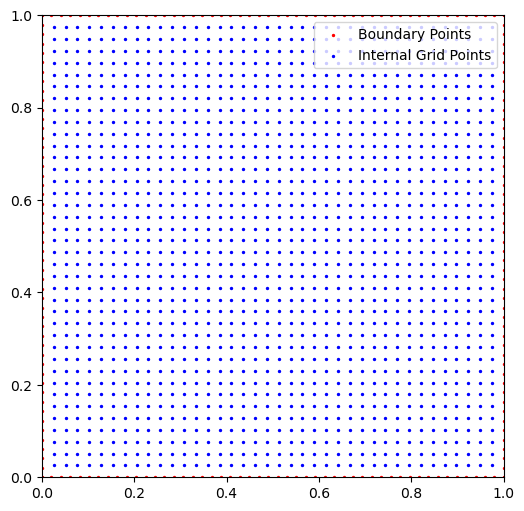

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 在边界上采样的点
num_samples_boundary = 50
x_boundary = np.linspace(0, 1, num_samples_boundary)
y_boundary = np.linspace(0, 1, num_samples_boundary)

# 上下边界
boundary_points = np.array([[x, 0] for x in x_boundary] + [[x, 1] for x in x_boundary])
# 左右边界
boundary_points = np.vstack([boundary_points, np.array([[0, y] for y in y_boundary]), np.array([[1, y] for y in y_boundary])])

# 在内部生成均匀网格点
num_samples_internal = 40
x_internal, y_internal = np.meshgrid(np.linspace(0, 1, num_samples_internal), np.linspace(0, 1, num_samples_internal))

# 将网格点展开成一维数组
x_internal_flat = x_internal.flatten()
y_internal_flat = y_internal.flatten()

# 过滤掉边界上的网格点，即 0 和 1 的位置
internal_points = np.array([[x, y] for x, y in zip(x_internal_flat, y_internal_flat) if 0 < x < 1 and 0 < y < 1])

# 画图
plt.figure(figsize=(6, 6))
# 绘制边界上的红色点
plt.scatter(boundary_points[:, 0], boundary_points[:, 1], color='red', label='Boundary Points',s=2)
# 绘制内部网格上的蓝色点
plt.scatter(internal_points[:, 0], internal_points[:, 1], color='blue', label='Internal Grid Points',s=2)

# 设置图像显示的范围
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')

# 添加图例
plt.legend()

# 显示图像
plt.show()


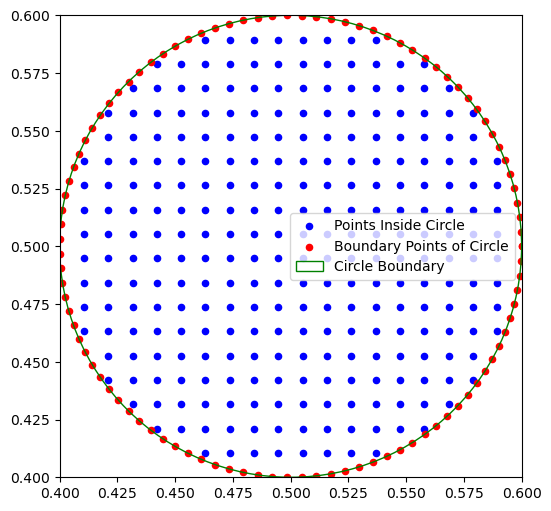

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 设置圆心和半径
center = np.array([0.5, 0.5])
radius = 0.1

# 在矩形 [0.4, 0.6]^2 上生成均匀网格点
num_samples_internal = 20
x_internal, y_internal = np.meshgrid(np.linspace(0.4, 0.6, num_samples_internal), np.linspace(0.4, 0.6, num_samples_internal))

# 将网格点展开成一维数组
x_internal_flat = x_internal.flatten()
y_internal_flat = y_internal.flatten()

# 过滤掉圆外和圆上的点，保留圆内的点
internal_points = np.array([[x, y] for x, y in zip(x_internal_flat, y_internal_flat)
                            if np.linalg.norm([x - center[0], y - center[1]]) < radius])

# 在圆的边界上进行均匀采样
num_samples_circle = 100
theta = np.linspace(0, 2 * np.pi, num_samples_circle)
circle_points = np.array([center[0] + radius * np.cos(theta), center[1] + radius * np.sin(theta)]).T

# 画图
plt.figure(figsize=(6, 6))

# 绘制矩形区域的网格点（圆内的蓝色点）
plt.scatter(internal_points[:, 0], internal_points[:, 1], color='blue', label='Points Inside Circle', s=20)

# 绘制圆边界上的红色点
plt.scatter(circle_points[:, 0], circle_points[:, 1], color='red', label='Boundary Points of Circle', s=20)

# 绘制圆的轮廓
circle = plt.Circle(center, radius, color='green', fill=False, label='Circle Boundary')
plt.gca().add_artist(circle)

# 设置图像显示的范围
plt.xlim(0.4, 0.6)
plt.ylim(0.4, 0.6)
plt.gca().set_aspect('equal', adjustable='box')

# 添加图例
plt.legend()

# 显示图像
plt.show()


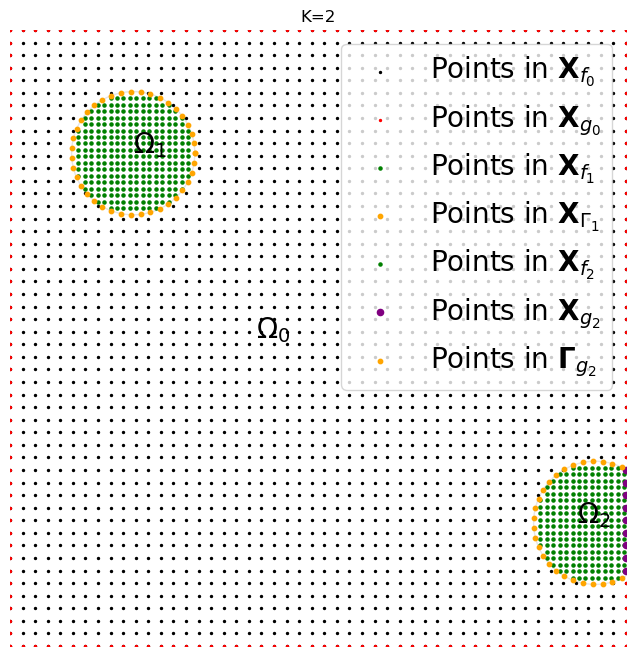

In [32]:
import numpy as np
import matplotlib.pyplot as plt
K=2
# 设置圆心和半径
center = np.array([0.2, 0.8])
radius = 0.1

# 设置圆心和半径
center1 = np.array([0.95, 0.2])

# 在整个矩形 [0, 1]^2 中生成内部点和边界点
num_samples = 50
x_points = np.linspace(0, 1, num_samples)
y_points = np.linspace(0, 1, num_samples)

# 内部点
X_internal, Y_internal = np.meshgrid(x_points, y_points)
internal_points = np.column_stack((X_internal.flatten(), Y_internal.flatten()))

# 边界点
boundary_points = []
# 上边界和下边界
boundary_points += [[x, 0] for x in x_points]
boundary_points += [[x, 1] for x in x_points]
# 左边界和右边界
boundary_points += [[0, y] for y in y_points]
boundary_points += [[1, y] for y in y_points]
boundary_points = np.array(boundary_points)
#过滤边界
if K==2:
    boundary_points2 =boundary_points[np.linalg.norm(boundary_points - center1, axis=1) <= radius] 
    boundary_points =boundary_points[np.linalg.norm(boundary_points - center1, axis=1) > radius] 

# 过滤掉圆内的点
filtered_internal_points=internal_points
if K>=1:
    filtered_internal_points = internal_points[np.linalg.norm(internal_points - center, axis=1) >= radius]
if K==2:
    filtered_internal_points = filtered_internal_points[np.linalg.norm(filtered_internal_points - center1, axis=1) >= radius]

if K>=1:
# 在矩形 [0.4, 0.6]^2 上生成均匀网格点
    num_samples_internal = 20
    x_internal = np.linspace(0.1, 0.3, num_samples_internal)
    y_internal = np.linspace(0.7, 0.9, num_samples_internal)
    X_internal_grid, Y_internal_grid = np.meshgrid(x_internal, y_internal)
    # 将网格点展开成一维数组
    internal_grid_points = np.column_stack((X_internal_grid.flatten(), Y_internal_grid.flatten()))
# 在矩形 [0.95, 0.2]^2 上生成均匀网格点
if K==2:
    num_samples_internal = 20
    x_internal1 = np.linspace(0.85, 1.05, num_samples_internal)
    y_internal1 = np.linspace(0.1, 0.3, num_samples_internal)
    X_internal1_grid, Y_internal1_grid = np.meshgrid(x_internal1, y_internal1)
    # 将网格点展开成一维数组
    internal1_grid_points = np.column_stack((X_internal1_grid.flatten(), Y_internal1_grid.flatten()))




# 过滤掉圆外和圆上的点，保留圆内的点
if K>=1:
    final_internal_points = internal_grid_points[np.linalg.norm(internal_grid_points - center, axis=1) < radius]
if K==2:
    # 过滤掉圆外和圆上的点，保留圆内的点
    final_internal1_points = internal1_grid_points[(np.linalg.norm(internal1_grid_points - center1, axis=1) < radius) &(internal1_grid_points[:,0]<1) & (internal1_grid_points[:,1]<1)]

# 在圆1的边界上进行均匀采样
num_samples_circle = 40
theta = np.linspace(0, 2 * np.pi, num_samples_circle)
circle_points = np.array([center[0] + radius * np.cos(theta), center[1] + radius * np.sin(theta)]).T
# 在圆2的边界上进行均匀采样
num_samples_circle = 40
theta = np.linspace(0, 2 * np.pi, num_samples_circle)
circle_points1 = np.array([center1[0] + radius * np.cos(theta), center1[1] + radius * np.sin(theta)]).T
#过滤掉在矩形外的店
circle_points1 = circle_points1[(circle_points[:,0]<1) & (circle_points[:,1]<1)]

# 画图
plt.figure(figsize=(8, 8))

# 绘制过滤后的内部点（大矩形内）
plt.scatter(filtered_internal_points[:, 0], filtered_internal_points[:, 1], color='black', s=2, label='Points in ' + r'$\mathbf{X}_{f_{0}}$')

# 绘制大矩形边界点
plt.scatter(boundary_points[:, 0], boundary_points[:, 1], color='red', s=2, label='Points in ' + r'$\mathbf{X}_{g_{0}}$')
if K>=1:
    # 绘制圆的轮廓
    circle = plt.Circle(center, radius, color='black',alpha=0.1 ,fill=False)
    plt.gca().add_artist(circle)

    # 绘制圆内的均匀网格点（小矩形内）
    plt.scatter(final_internal_points[:, 0], final_internal_points[:, 1], color='green', s=5,label='Points in ' + r'$\mathbf{X}_{f_{1}}$')

    # 绘制圆的边界上的点
    plt.scatter(circle_points[:, 0], circle_points[:, 1], color='orange', s=10,label='Points in ' + r'$\mathbf{X}_{\Gamma_{1}}$')

if K==2:
    # 绘制圆的轮廓
    circle1 = plt.Circle(center1, radius, color='black',alpha=0.1 ,fill=False)
    plt.gca().add_artist(circle1)

    # 绘制圆内的均匀网格点（小矩形内）
    plt.scatter(final_internal1_points[:, 0], final_internal1_points[:, 1], color='green', s=5,label='Points in ' + r'$\mathbf{X}_{f_{2}}$')

    # 绘制圆的边界上的点
    plt.scatter(boundary_points2[:,0],boundary_points2[:,1],color='purple',s=20,label='Points in ' + r'$\mathbf{X}_{g_{2}}$')
    plt.scatter(circle_points1[:, 0], circle_points1[:, 1], color='orange', s=10,label='Points in ' + r'$\mathbf{\Gamma}_{g_{2}}$')
plt.text(0.4, 0.5, r'$\Omega_{0}$', fontsize=20)
if K>=1:
    plt.text(0.2, 0.8, r'$\Omega_{1}$', fontsize=20)
if K==2:
    plt.text(0.92, 0.2, r'$\Omega_{2}$', fontsize=20)
# 设置图像显示的范围
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks([])
plt.yticks([])

plt.axis('off')
# 添加图例
plt.legend(loc='upper right',fontsize=20)

# 显示图像
plt.title(f"K={K}")
plt.savefig(f'K={K}.pdf',dpi=300)
plt.show()
